###### Moises Quiroz Diaz

Modelo implementado con SVM para clasificar la calidad de un conjuto de datos sobre vinos

In [12]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lec5_graphs as afx

warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('seaborn')

In [13]:
df = pd.read_csv('winequality_merged.csv').drop(columns ='Unnamed: 0')
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Se procede a realizar una serie de graficos para ver la distribucion de cada variable y a su vez corroborar si es un dato continuo o discreto

In [14]:
rows = 4 ; cols = df.shape[1]/rows

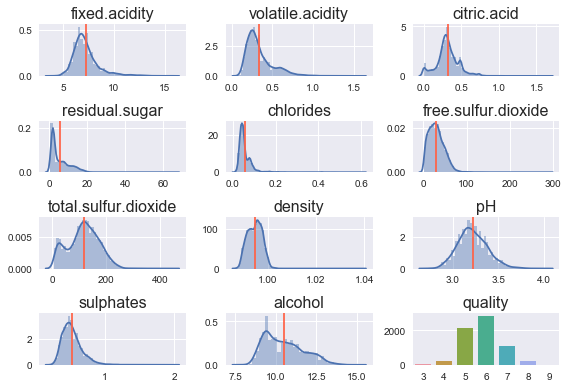

In [15]:
for index,(colname,serie) in enumerate(df.iteritems()):
    plt.subplot(rows,cols,index+1)
    if pd.api.types.is_float_dtype(serie) is True:
        sns.distplot(serie)
        plt.axvline(np.mean(serie),color='tomato')
    elif pd.api.types.is_integer_dtype(serie) is True:
        sns.countplot(serie)
    plt.title(colname,fontsize=16)
    plt.xlabel('');plt.ylabel('');plt.tight_layout()

Se observa que la mayoria de las variables presenta valores de promedio bajos y lo siguiente es realizar una binarizacion del vector objetivo 'quality'

In [16]:
df['quality_bin'] = np.where(df['quality']> np.mean(df['quality']),1,0)
df.quality_bin.value_counts('%').round(3)

1    0.633
0    0.367
Name: quality_bin, dtype: float64

Luego de este ver como es que se comporta el dataset, se procede a realizar un modelo de suport vector machine para clasificacion

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
df = df.drop(columns = 'quality')

In [19]:
X_train,X_test, y_train , y_test = train_test_split(df[df.columns[:-1]],df['quality_bin'],test_size=.33,random_state=11238)